In [2]:
!pip install catboost


   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.3/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.5/102.4 MB 840.2 kB/s eta 0:02:02
   ---------------------------------------- 0.8/102.4 MB 860.9 kB/s eta 0:01:59
   ---------------------------------------- 0.8/102.4 MB 860.9 kB/s eta 0:01:59
   ---------------------------------------- 1.0/102.4 MB 839.3 kB/s eta 0:02:01
    --------------------------------------- 1.3/102.4 MB 907.1 kB/s eta 0:01:52
    --------------------------------------- 1.6/102.4 MB 921.7 kB/s eta 0:01:50
    --------------------------------------- 1.8/102.4 MB 923.6 kB/s eta 0:01:49
    --------------------------------------- 2.1/102.4 MB 924.9 kB/s eta 0:01:49
    --------------------------------------- 2.1/102.4 MB 924.9 kB/s eta 0:01


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    matthews_corrcoef, classification_report, confusion_matrix
)
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# ===========================
# 1. Load Dataset
# ===========================
df = pd.read_csv("matches.csv")

df = df.dropna(subset=["winner"])   # drop rows with missing target
y = df["winner"]

X = df.drop(columns=["winner"])
X = X.select_dtypes(include=["number"])  # only numeric

# 🔹 Fill missing values with median
imputer = SimpleImputer(strategy="median")
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# ===========================
# 2. Train-Test Split
# ===========================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ===========================
# 3. Handle Imbalance (SMOTE)
# ===========================
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# ===========================
# 4. Train CatBoost
# ===========================
cat = CatBoostClassifier(
    iterations=300,
    depth=6,
    learning_rate=0.1,
    random_seed=42,
    verbose=0
)
cat.fit(X_train, y_train)

# ===========================
# 5. Predictions
# ===========================
y_pred = cat.predict(X_test)

# ===========================
# 6. Metrics
# ===========================
print("🔹 CatBoost Performance")
print("✅ Accuracy :", accuracy_score(y_test, y_pred))
print("✅ Precision:", precision_score(y_test, y_pred, average="weighted", zero_division=0))
print("✅ Recall   :", recall_score(y_test, y_pred, average="weighted"))
print("✅ F1 Score :", f1_score(y_test, y_pred, average="weighted"))
print("✅ MCC      :", matthews_corrcoef(y_test, y_pred))

print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ===========================
# 7. Confusion Matrix
# ===========================
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("CatBoost - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


ValueError: Expected n_neighbors <= n_samples_fit, but n_neighbors = 6, n_samples_fit = 5, n_samples = 5

In [6]:
smote = SMOTE(random_state=42, k_neighbors=2)  # default 5 hota hai, hum 2 kar diye
X_train, y_train = smote.fit_resample(X_train, y_train)


In [7]:
cat = CatBoostClassifier(
    iterations=300,
    depth=6,
    learning_rate=0.1,
    loss_function="Logloss",
    eval_metric="Accuracy",
    auto_class_weights="Balanced",  # imbalance handle karega
    verbose=0
)


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, matthews_corrcoef, classification_report, confusion_matrix
)
from catboost import CatBoostClassifier

# ==============================
# 1. Load Dataset
# ==============================
df = pd.read_csv("matches.csv")  # apna dataset

X = df.drop("result", axis=1)
y = df["result"]

cat_features = X.select_dtypes(include=["object"]).columns.tolist()
X = X.fillna(-999)

# ==============================
# 2. Train-Test Split
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ==============================
# 3. Train CatBoost (Multi-Class)
# ==============================
cat = CatBoostClassifier(
    iterations=300,
    depth=6,
    learning_rate=0.1,
    loss_function="MultiClass",   # ✅ multi-class ke liye
    eval_metric="Accuracy",
    auto_class_weights="Balanced",  
    verbose=0
)
cat.fit(X_train, y_train, cat_features=cat_features)

# ==============================
# 4. Predictions & Metrics
# ==============================
y_pred = cat.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average="weighted"))
print("Recall:", recall_score(y_test, y_pred, average="weighted"))
print("F1 Score:", f1_score(y_test, y_pred, average="weighted"))

# MCC multi-class me bhi chalega
print("MCC:", matthews_corrcoef(y_test, y_pred))

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.908675799086758
Precision: 0.916974981285344
Recall: 0.908675799086758
F1 Score: 0.9076750743683732
MCC: 0.8299716856644945

Classification Report:
               precision    recall  f1-score   support

   no result       1.00      1.00      1.00         1
        runs       0.98      0.82      0.89       100
         tie       1.00      1.00      1.00         3
     wickets       0.86      0.98      0.92       115

    accuracy                           0.91       219
   macro avg       0.96      0.95      0.95       219
weighted avg       0.92      0.91      0.91       219


Confusion Matrix:
 [[  1   0   0   0]
 [  0  82   0  18]
 [  0   0   3   0]
 [  0   2   0 113]]


Accuracy: 0.908675799086758
Precision: 0.916974981285344
Recall: 0.908675799086758
F1 Score: 0.9076750743683732
MCC: 0.8299716856644945

Classification Report:
               precision    recall  f1-score   support

   no result       1.00      1.00      1.00         1
        runs       0.98      0.82      0.89       100
         tie       1.00      1.00      1.00         3
     wickets       0.86      0.98      0.92       115

    accuracy                           0.91       219
   macro avg       0.96      0.95      0.95       219
weighted avg       0.92      0.91      0.91       219



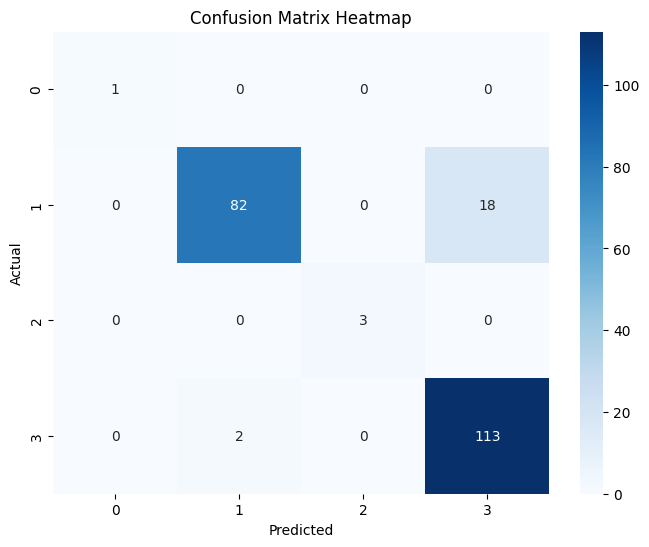

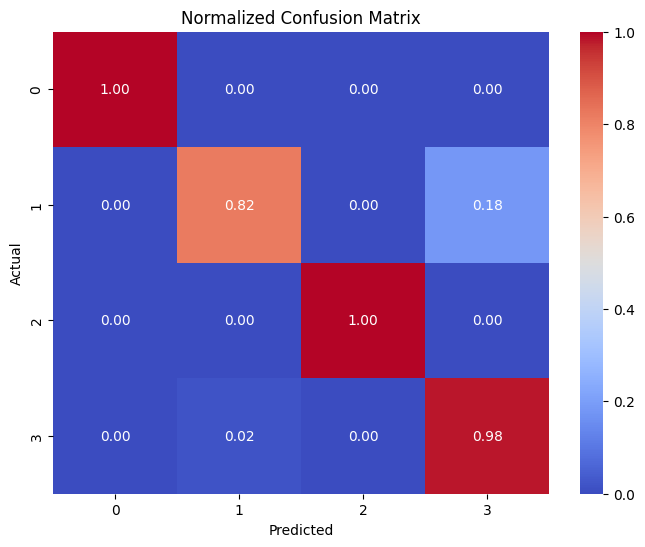

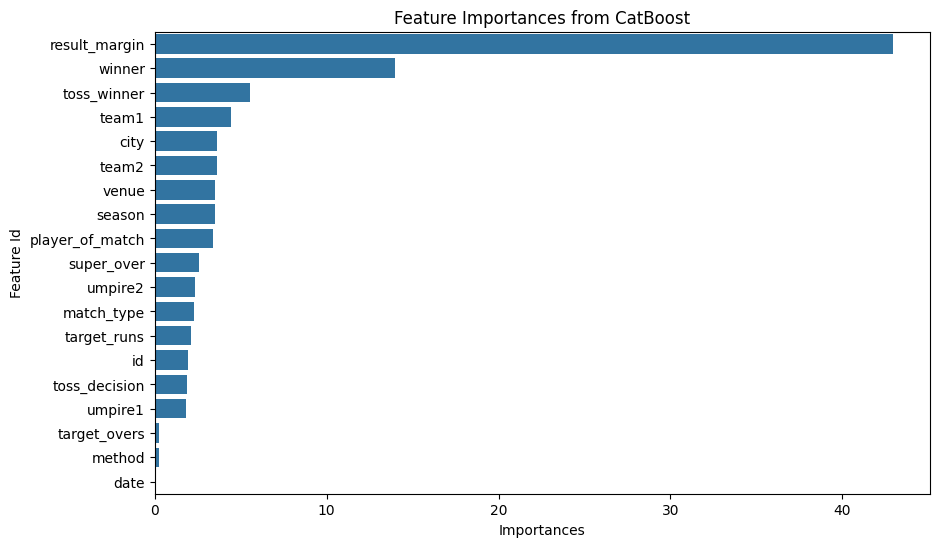

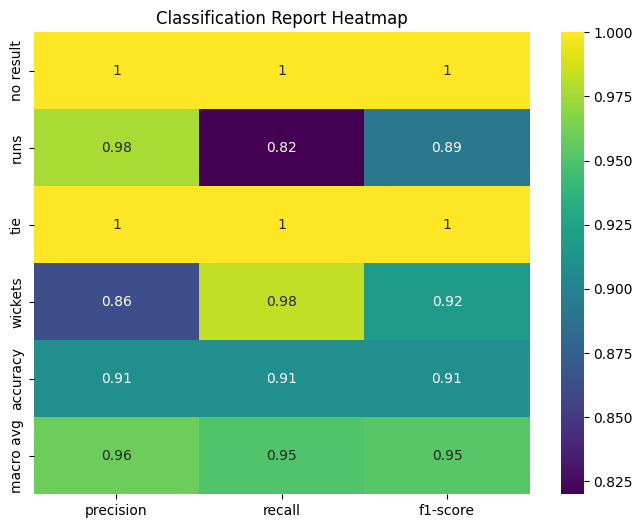

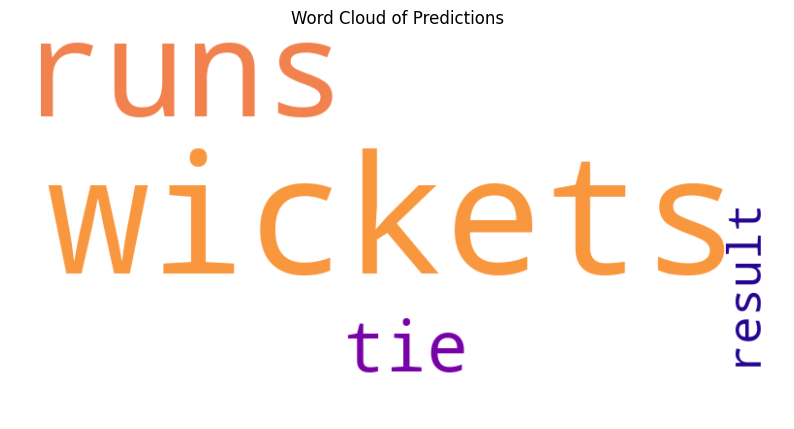

c:\Users\tarun\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1201: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\tarun\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1201: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\tarun\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1201: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\tarun\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1201: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


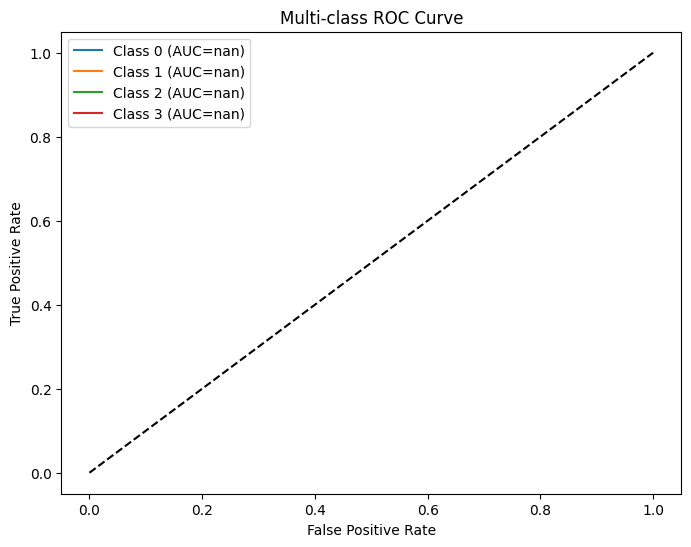

C:\Users\tarun\AppData\Local\Temp\ipykernel_11324\935264758.py:122: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_pred.flatten(), palette="Set2")


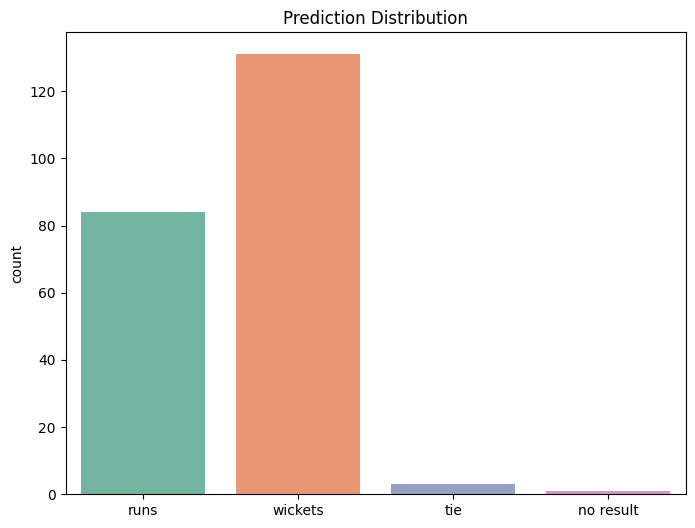

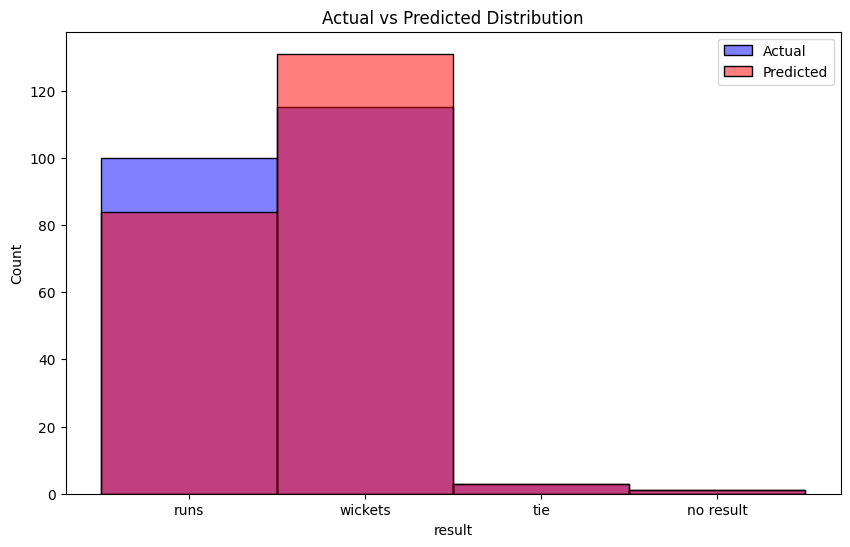

C:\Users\tarun\AppData\Local\Temp\ipykernel_11324\935264758.py:141: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=np.unique(y_test), y=mcc_per_class, palette="cool")


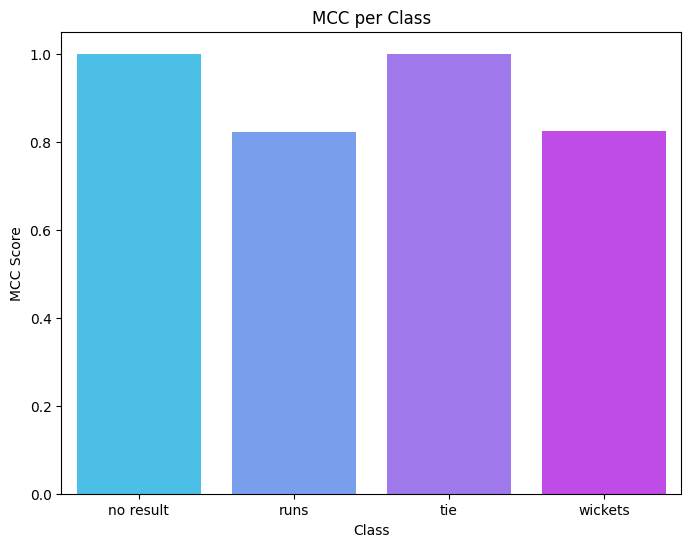

C:\Users\tarun\AppData\Local\Temp\ipykernel_11324\935264758.py:150: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=np.unique(y_test), y=acc_per_class, palette="magma")


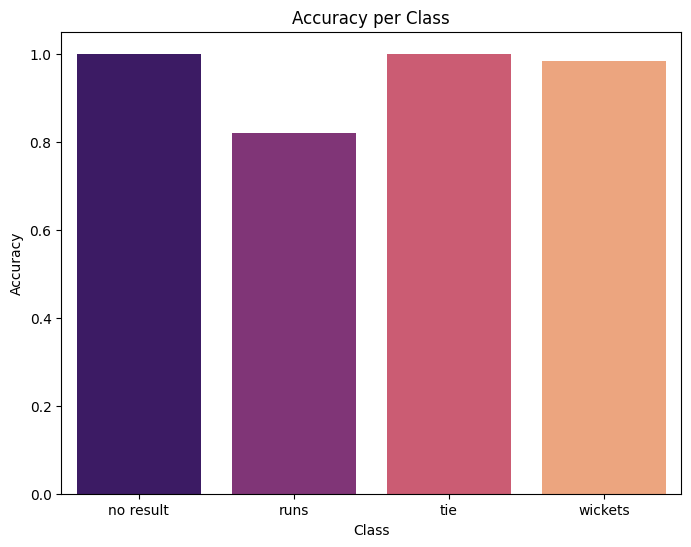

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, matthews_corrcoef, classification_report, confusion_matrix,
    roc_curve, auc
)
from catboost import CatBoostClassifier
from wordcloud import WordCloud

# ==============================
# 1. Load Dataset
# ==============================
df = pd.read_csv("matches.csv")

X = df.drop("result", axis=1)
y = df["result"]

# Handle categorical
cat_features = X.select_dtypes(include=["object"]).columns.tolist()
X = X.fillna(-999)

# ==============================
# 2. Train-Test Split
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ==============================
# 3. Train CatBoost (Multi-Class)
# ==============================
cat = CatBoostClassifier(
    iterations=300,
    depth=6,
    learning_rate=0.1,
    loss_function="MultiClass",
    eval_metric="Accuracy",
    auto_class_weights="Balanced",
    verbose=0
)
cat.fit(X_train, y_train, cat_features=cat_features)

# ==============================
# 4. Predictions & Metrics
# ==============================
y_pred = cat.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average="weighted"))
print("Recall:", recall_score(y_test, y_pred, average="weighted"))
print("F1 Score:", f1_score(y_test, y_pred, average="weighted"))
print("MCC:", matthews_corrcoef(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

# ==============================
# 5. Advance Visualizations (10)
# ==============================

# 1️⃣ Confusion Matrix Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 2️⃣ Normalized Confusion Matrix
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(8,6))
sns.heatmap(cm_norm, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Normalized Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 3️⃣ Feature Importance (CatBoost)
feat_importances = cat.get_feature_importance(prettified=True)
plt.figure(figsize=(10,6))
sns.barplot(x="Importances", y="Feature Id", data=feat_importances.sort_values(by="Importances", ascending=False))
plt.title("Feature Importances from CatBoost")
plt.show()

# 4️⃣ Classification Report Heatmap
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()
plt.figure(figsize=(8,6))
sns.heatmap(df_report.iloc[:-1, :-1], annot=True, cmap="viridis")
plt.title("Classification Report Heatmap")
plt.show()

# 5️⃣ WordCloud from Predictions
text = " ".join(map(str, y_pred.flatten()))
wc = WordCloud(width=800, height=400, background_color="white", colormap="plasma").generate(text)
plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Predictions")
plt.show()

# 6️⃣ ROC Curve (One-vs-Rest for multi-class)
y_prob = cat.predict_proba(X_test)
plt.figure(figsize=(8,6))
for i in range(y_prob.shape[1]):
    fpr, tpr, _ = roc_curve((y_test == i).astype(int), y_prob[:, i])
    plt.plot(fpr, tpr, label=f"Class {i} (AUC={auc(fpr, tpr):.2f})")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multi-class ROC Curve")
plt.legend()
plt.show()

# 7️⃣ Prediction Distribution
plt.figure(figsize=(8,6))
sns.countplot(x=y_pred.flatten(), palette="Set2")
plt.title("Prediction Distribution")
plt.show()

# 8️⃣ Actual vs Predicted Comparison
plt.figure(figsize=(10,6))
sns.histplot(y_test, color="blue", alpha=0.5, label="Actual")
sns.histplot(y_pred.flatten(), color="red", alpha=0.5, label="Predicted")
plt.legend()
plt.title("Actual vs Predicted Distribution")
plt.show()

# 9️⃣ MCC Trend by Class
mcc_per_class = []
for i in np.unique(y_test):
    y_true_bin = (y_test == i).astype(int)
    y_pred_bin = (y_pred.flatten() == i).astype(int)
    mcc_per_class.append(matthews_corrcoef(y_true_bin, y_pred_bin))
plt.figure(figsize=(8,6))
sns.barplot(x=np.unique(y_test), y=mcc_per_class, palette="cool")
plt.title("MCC per Class")
plt.xlabel("Class")
plt.ylabel("MCC Score")
plt.show()

# 🔟 Accuracy by Class
acc_per_class = cm.diagonal() / cm.sum(axis=1)
plt.figure(figsize=(8,6))
sns.barplot(x=np.unique(y_test), y=acc_per_class, palette="magma")
plt.title("Accuracy per Class")
plt.xlabel("Class")
plt.ylabel("Accuracy")
plt.show()
